In [37]:
import numpy as np
import stats
import matplotlib.pyplot as plt
# from scratch.linear_algebra import dot
from collections import Counter

##### Data Set

We are seeking to provide a description of how many friends the members of the social network from chapter 1 have.



In [38]:
users = [
{ "id": 0, "name": "Hero" },
{ "id": 1, "name": "Dunn" },
{ "id": 2, "name": "Sue" },
{ "id": 3, "name": "Chi" },
{ "id": 4, "name": "Thor" },
{ "id": 5, "name": "Clive" },
{ "id": 6, "name": "Hicks" },
{ "id": 7, "name": "Devin" },
{ "id": 8, "name": "Kate" },
{ "id": 9, "name": "Klein" }
]

# friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
# (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

#friendship_pairs with an outlier
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9), (1,8), (1,9), (1,5), (1,4),(1,7)]


#initialize the empty dict
friendships = {user['id']: [] for user in users} #create dict with keys "id" and value []

#and populate it from friendship pairs
for i, j in friendship_pairs:
    friendships[i].append(j)
    friendships[j].append(i)
    
print(friendships)

def number_of_friends(user):
    return len(friendships[user["id"]])

total_connections = sum(number_of_friends(user) for user in users)
print(total_connections)

num_friends = [number_of_friends(user) for user in users]
print(num_friends)

{0: [1, 2], 1: [0, 2, 3, 8, 9, 5, 4, 7], 2: [0, 1, 3], 3: [1, 2, 4], 4: [3, 5, 1], 5: [4, 6, 7, 1], 6: [5, 8], 7: [5, 8, 1], 8: [6, 7, 9, 1], 9: [8, 1]}
34
[2, 8, 3, 3, 3, 4, 2, 3, 4, 2]


We'll undertake a statistical exploration of the dataset num_friends. Beginning with a histogram of the friend counts

Counter({3: 4, 2: 3, 4: 2, 8: 1})


Text(0, 0.5, '# of people')

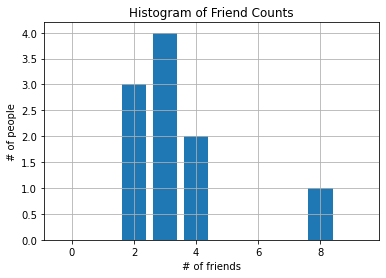

In [39]:
counts = Counter(num_friends)
print(counts)
xs = range(10) #x values
ys = [counts[x] for x in xs] #y values - # of friends
plt.bar(xs,ys)
#plt.axis([0, 10, 0, 8])
plt.grid()
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")

Now we'll generate some statistics

In [40]:
num_friends = np.array(num_friends) #for computation speed
num_point = len(num_friends) #total number
largest, smallest = num_friends.max(), num_friends.min() #range

#Now centeral tendency of data
mean = np.average(num_friends)
median = np.median(num_friends)
print(mean, median)

#median is insensitive to outliers unlike the mean
#the mean scales proportionately to increases in a single datapoint like (scalar increase)/n
#median does not scale proportionately 

#compute median via quantile
print(np.quantile(num_friends, 0.5))

#compute mode
mode = stats.mode(num_friends)

3.4 3.0
3.0


In [41]:
#Dispersion via range
data_range = largest - smallest
print(data_range)

#dispersion via variance
def variance(x):
    return np.array([(i - np.mean(x))**2 for i in x]).sum() / (len(x) - 1)

print(variance(num_friends), stats.variance(num_friends))

#these are both affected by outliers like the mean 
#a robust alternative is the difference between the 75th and 25th percentile
#ie the interquartile range
def interquartile_range(x):
    return np.quantile(x, 0.75) - np.quantile(x, 0.25)


6
3.1555555555555554 3.155555555555555


##### Correlation

Now that we've covered basic descriptive statistics we examine correlation. In this context we are looking to see if time spent on the site is related to number of friends on the site. 

Spse we have a dataset of daily_minutes ordered to correspond to the elements of the num_friends list

In [42]:
print(num_friends)

#simulate daily_minutes with random 
np.random.seed(500000)
daily_minutes = np.random.randint(0,200, size=len(num_friends))
print(daily_minutes)

#first find covarience to measure how these two variables vary in tandem with their means
def covariance(x,y):
    assert len(x)==len(y), "x and y must have the same number of elements"
    return np.dot(np.array([i-np.mean(x) for i in x]), np.array([j-np.mean(y) for j in y]) ) / (len(x)-1)

cov2 = np.cov(num_friends, daily_minutes)

print(covariance(num_friends, daily_minutes))
print(cov2[0,1])

[2 8 3 3 3 4 2 3 4 2]
[ 21 139 105  40 149 148  68  82  80 119]
37.17777777777778
37.177777777777784


What does Covariance Mean?

Since we are taking the unsquared difference of the data from the two sample means that if the ith x and y are greater or less than their means then a positive quantity is summed and we will get a "Large" positve covariance that means x and y are proportional quantities. When one is greater that its mean but the other is lesser then we get a negative quantity in the sum and a negative convarience says x and y are inversly proportional. Thus a covariance of zero means no such relationship exists. 

Interpretation can be difficult because the units are products of x an y units. Covariance scales with size of data set, if x and y are increased proportionally, the covarience scales even though the data is just as interrelated as before. Therefore, it's hard to say what a large covarience is.

We instead now look at the correlation which is unitless thanks to normalization, and is in the range of [-1,1] where 1 is perectly correlated and -1 is perfectly anticorrelated.

Correlation 0.4684925824355784


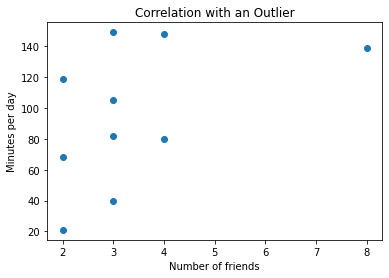

In [43]:
def correlation(x,y):
    std_x, std_y = np.sqrt(variance(x)), np.sqrt(variance(y))
    if std_x and std_y > 0:
        return covariance(x,y) / (std_x * std_y)
    else:
        return 0 #no variation 
    
correlate = correlation(num_friends, daily_minutes)
print('Correlation', correlate)

plt.scatter(num_friends, daily_minutes)
plt.xlabel("Number of friends")
plt.ylabel("Minutes per day")
plt.title("Correlation with an Outlier")
plt.show()

[2 8 3 3 3 4 2 3 4 2]


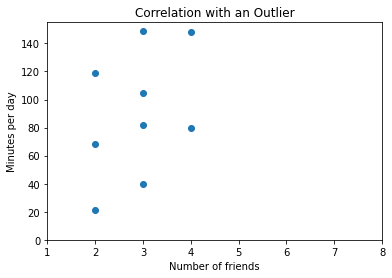

In [49]:
#We now want to eliminate the outlier
print(num_friends)

#locate the outlier's index
outlier = list(num_friends.copy()).index(8)

#remaining data
rem_friends = [x for i, x in enumerate(num_friends) if i != outlier]
rem_minutes = [x for i, x in enumerate(daily_minutes) if i != outlier]

plt.scatter(rem_friends, rem_minutes)
plt.axis([1.0,8.0,0.0,155.0])
plt.xlabel("Number of friends")
plt.ylabel("Minutes per day")
plt.title("Correlation with an Outlier")
plt.show()

##### Simpson's Paradox

A situation in which correlations are misleading when confounding variable are ignored. Eg: from our user data, suppose the members can be divided between west and east coast residents.

We look at the average number of friends of both groups and see that west coast users have a higher average number of friends. However, when we also look at average frineds vs whether or not the users have a PhD, people on the east coast with PhD's have more friends on average and people without PhDs have more friends on average. So once we binned the degree data we found the data was correlated in the opposite direction - friendlier east coast. Binning by east vs west disguised correlational aspects of the data.

This phenomena can happen regularly. How do we avoid it? Well, correlation measures the relationship between two variables with all else being equal. The key in this example is that there was inequality in that some users have a PhD, while others do not. 

If dataclasses are really random in assignment as they are in a well designed experiment, analysis assuming two variables have all other factors being equal is valid. However, when their is a deeper pattern to class assignments, all else being equal is flawed.

The only true way to avoid this phenomenon is by knowing the data inside and out and checking for confounding factors. 

##### Other Correlational Caveats

